In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
def DTWDistance(s1, s2, w=None):

    DTW = np.zeros((len(s1), len(s2)))

    if w:
        w = max(w, abs(len(s1) - len(s2)))

        for i in range(-1, len(s1)):
            for j in range(-1, len(s2)):
                DTW[i, j] = float('inf')

    else:
        for i in range(len(s1)):
            DTW[i, -1] = float('inf')
        for i in range(len(s2)):
            DTW[-1, i] = float('inf')

    DTW[-1, -1] = 0

    for i in range(len(s1)):
        if w:
            for j in range(max(0, i - w), min(len(s2), i + w)):
                dist = (s1[i] - s2[j]) ** 2
                DTW[i, j] = dist + min(DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1])
        else:
            for j in range(len(s2)):
                dist = (s1[i] - s2[j]) ** 2
                DTW[i, j] = dist + min(DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1])

    return np.sqrt(DTW[len(s1) - 1, len(s2) - 1])

In [66]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar();

In [101]:
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

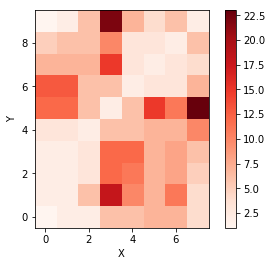

In [68]:
dtw = DTWDistance(x, y)
distance_cost_plot(dtw)

In [69]:
s1 = x
s2 = y
w = 2

distances = np.zeros((len(s2), len(s1)))

for i in range(len(y)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-y[i])**2  

distances

array([[ 1.,  1.,  0.,  0.,  1.,  9.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  0.,  1.,  9.,  1.,  0.,  1.,  1.],
       [ 0.,  4.,  1.,  1.,  0.,  4.,  0.,  1.,  0.,  4.],
       [ 4., 16.,  9.,  9.,  4.,  0.,  4.,  9.,  4., 16.],
       [ 0.,  4.,  1.,  1.,  0.,  4.,  0.,  1.,  0.,  4.],
       [ 1.,  1.,  0.,  0.,  1.,  9.,  1.,  0.,  1.,  1.],
       [ 0.,  4.,  1.,  1.,  0.,  4.,  0.,  1.,  0.,  4.],
       [ 4.,  0.,  1.,  1.,  4., 16.,  4.,  1.,  4.,  0.]])

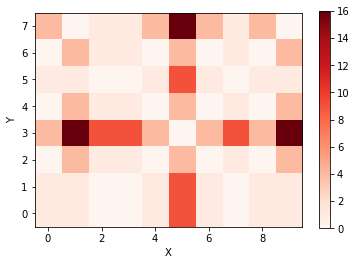

In [70]:
distance_cost_plot(distances)

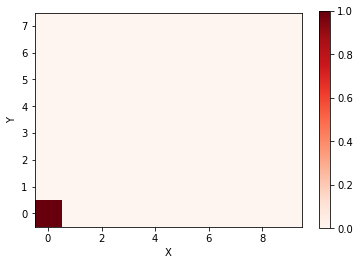

In [71]:
accumulated_cost = np.zeros((len(y), len(x)))
accumulated_cost[0,0] = distances[0,0]
distance_cost_plot(accumulated_cost)

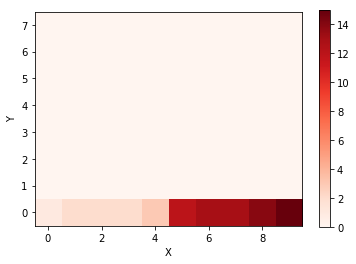

In [72]:
for i in range(1, len(x)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]    
distance_cost_plot(accumulated_cost)

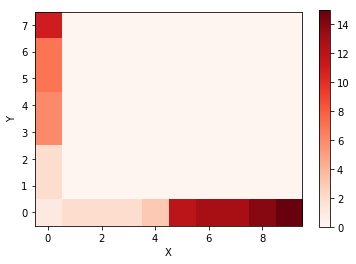

In [73]:
for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]  
distance_cost_plot(accumulated_cost)

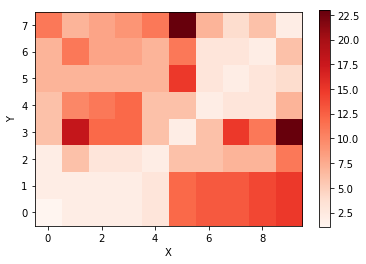

In [74]:
for i in range(1, len(y)):
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
distance_cost_plot(accumulated_cost)

In [102]:
def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 or j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return path, cost

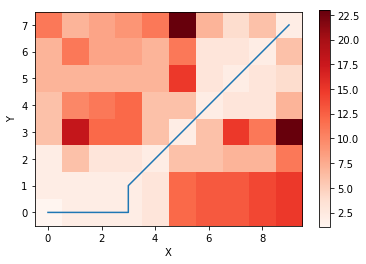

In [94]:
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]
distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y);

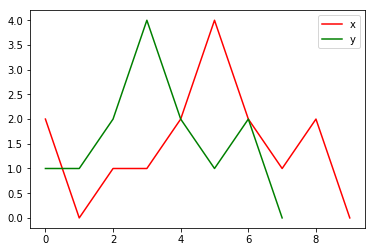

In [90]:
plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend();

In [92]:
cost = 0
for [y, x] in path:
        cost = cost +distances[x, y]
cost

3.0

9 [0] : 7 [0]
8 [2] : 6 [2]
7 [1] : 5 [1]
6 [2] : 4 [2]
5 [4] : 3 [4]
4 [2] : 2 [2]
3 [1] : 1 [1]
3 [1] : 0 [1]
2 [1] : 0 [1]
1 [0] : 0 [1]
0 [2] : 0 [1]
0 [2] : 0 [1]


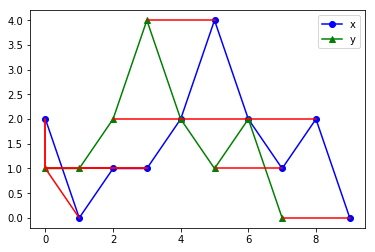

In [103]:
plt.plot(x, 'bo-' ,label='x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    print(map_x, x[map_x], ":", map_y, y[map_y])
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')

In [107]:
dtw = DTWDistance(x, y)
dtw

1.4142135623730951